# Exploratory Analysis

Using this notebook to analyze the effects of our features on our label

## Index

- [Imports](#Imports)
- [Num votes vs rating](#Num-votes-vs-rating)
- [Release year vs rating](#Release-year-vs-rating)
- [Num regions vs rating](#Num-regions-vs-rating)
- [Runtime vs rating](#Runtime-vs-rating)
- [Cast and Crew vs rating](#Cast-and-Crew-vs-rating)
- [Adult vs rating](#Adult-vs-rating)
- [Genre vs ratings](#Genre-vs-ratings)
- [Creating the final Training Dataset](#Creating-the-final-Training-Dataset)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from collections import Counter

In [5]:
import seaborn as sns

In [6]:
import os 
import sys

In [7]:
from tqdm import tqdm

In [8]:
import json

In [9]:
import tqdm.notebook as tq

In [10]:
from pandas import Panel

/home/tanmay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  """Entry point for launching an IPython kernel.


In [11]:
tqdm.pandas()

/home/tanmay/anaconda3/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [12]:
from pandarallel import pandarallel

In [13]:
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [14]:
df = pd.read_csv('processed/title_rating_prof_reg_one.csv')

In [15]:
df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,averageRating,numVotes,genres,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,tt0000502,movie,Bohemios,Bohemios,0,1970-01-01 00:00:00.000001905,100.0,4.5,14,"Comedy,Musical",...,0,0,0,0,0,0,0,0,0,0
1,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1970-01-01 00:00:00.000001906,70.0,6.0,754,"Action,Adventure,Biography",...,0,0,0,0,0,0,0,0,0,0
2,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1970-01-01 00:00:00.000001907,90.0,4.6,17,Drama,...,0,0,0,0,0,0,0,0,0,0
3,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1970-01-01 00:00:00.000001907,96.0,4.5,23,Drama,...,0,0,0,0,0,0,0,0,0,0
4,tt0000630,movie,Hamlet,Amleto,0,1970-01-01 00:00:00.000001908,130.0,3.8,24,Drama,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323829,tt9916362,movie,Coven,Akelarre,0,2020-01-01,92.0,6.4,4447,"Drama,History",...,0,0,0,0,0,0,0,0,0,0
323830,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019-01-01,93.0,3.8,14,"Adventure,History,War",...,0,0,0,0,0,0,0,0,1,0
323831,tt9916460,tvMovie,Pink Taxi,Pink Taxi,0,2019-01-01,10.0,9.3,17,Comedy,...,0,0,0,0,0,0,0,0,0,0
323832,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019-01-01,123.0,8.3,6,Drama,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'runtimeMinutes', 'averageRating', 'numVotes', 'genres',
       'cast_mean', 'cast_std', 'cast_max', 'crew_mean', 'crew_std',
       'crew_max', 'cast_exp', 'crew_exp', 'numRegions', 'Action', 'Adult',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [17]:
df['startYear'] = df['startYear'].apply(lambda x: pd.to_datetime(x).year)

### Num votes vs rating

Text(0, 0.5, 'IMDB Rating')

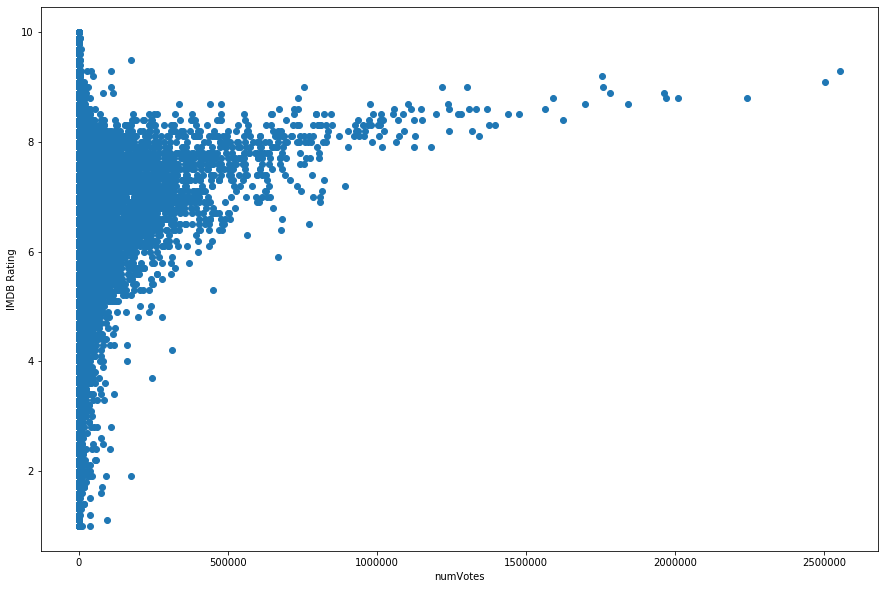

In [83]:
plt.figure(figsize=(15, 10))
plt.scatter(df['numVotes'], df['averageRating'])
plt.xlabel("numVotes")
plt.ylabel("IMDB Rating")

**Insights**: There is a positive relationship between number of votes and the IMDB rating. This indicates that popular movies could have a higher rating in general.

### Release year vs rating

Text(0, 0.5, 'IMDB Rating')

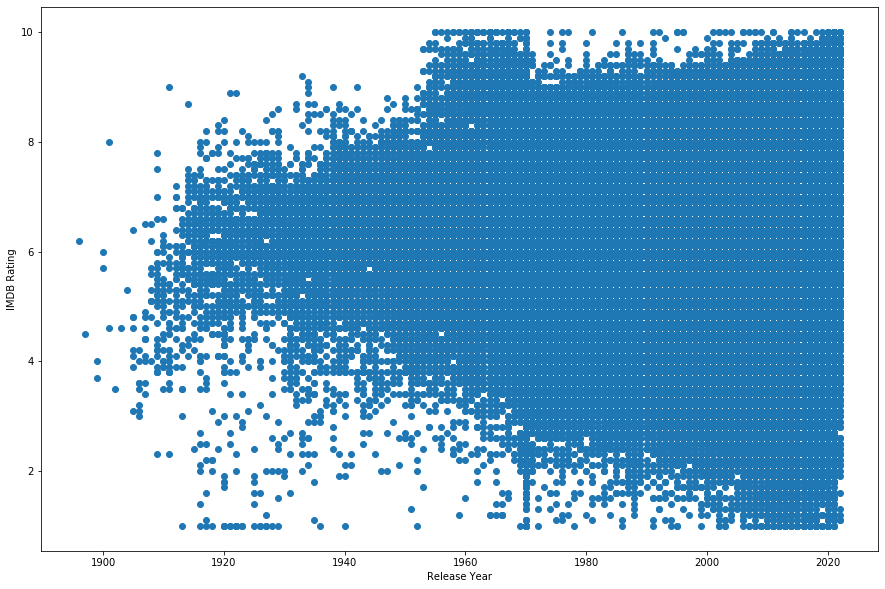

In [84]:
plt.figure(figsize=(15, 10))
plt.scatter(df['startYear'], df['averageRating'])
plt.xlabel("Release Year")
plt.ylabel("IMDB Rating")

**Insights**: Older movies have a lower variance in reviews. Since reviews were given in the recent past, the reviews for older films may tend to be more tempered. 

### Num regions vs rating

Text(0, 0.5, 'IMDB Rating')

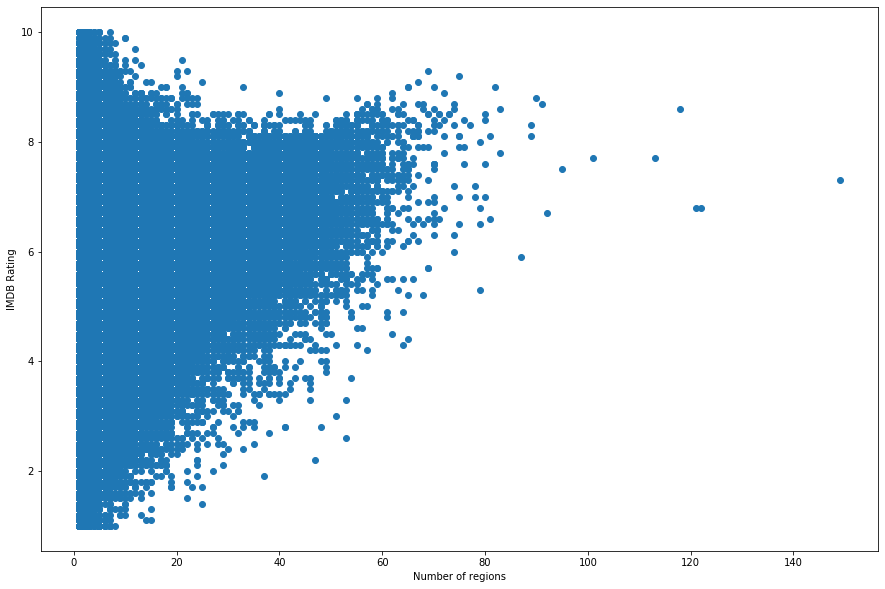

In [85]:
plt.figure(figsize=(15, 10))
plt.scatter(df['numRegions'], df['averageRating'])
plt.xlabel("Number of regions")
plt.ylabel("IMDB Rating")

**Insights**: There is a positive relationship between number of regions a movie was featured in and the IMDB rating. This indicates that popular movies could have a higher rating in general

### Runtime vs rating

Text(0, 0.5, 'IMDB Rating')

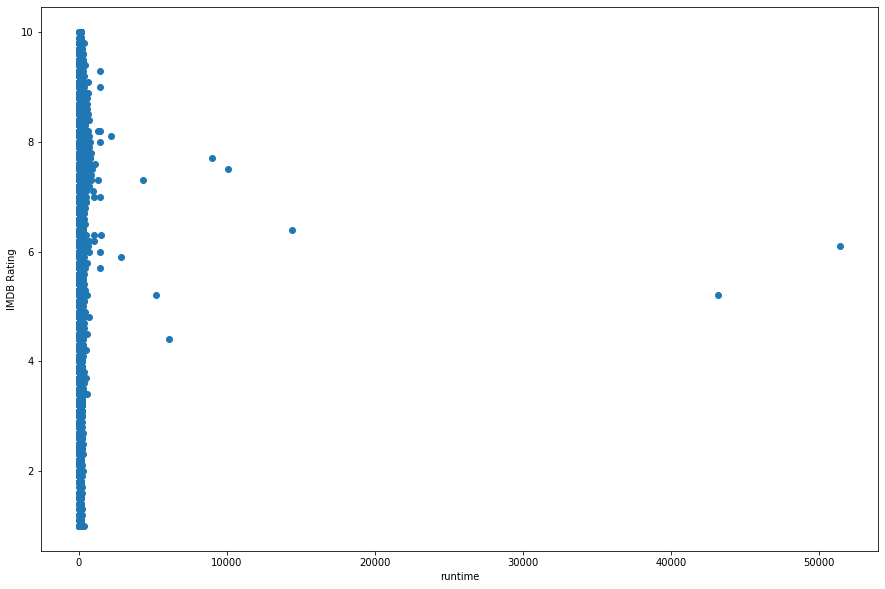

In [86]:
plt.figure(figsize=(15, 10))
plt.scatter(df['runtimeMinutes'], df['averageRating'])
plt.xlabel("runtime")
plt.ylabel("IMDB Rating")

**Insights**: There is no distinct relationship between runtime and ratings

### Cast and Crew vs rating

Text(0, 0.5, 'IMDB Rating')

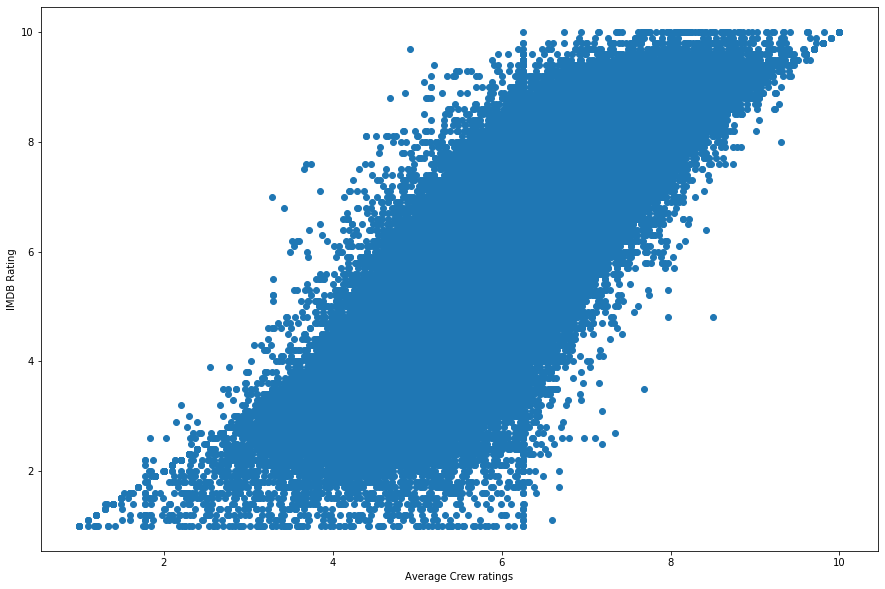

In [95]:
plt.figure(figsize=(15, 10))
plt.scatter(df['crew_mean'], df['averageRating'])
plt.xlabel("Average Crew ratings")
plt.ylabel("IMDB Rating")

**Insights**: There is a strong positive relationship between the mean crew rating of a movie and its IMDB rating.

Text(0, 0.5, 'IMDB Rating')

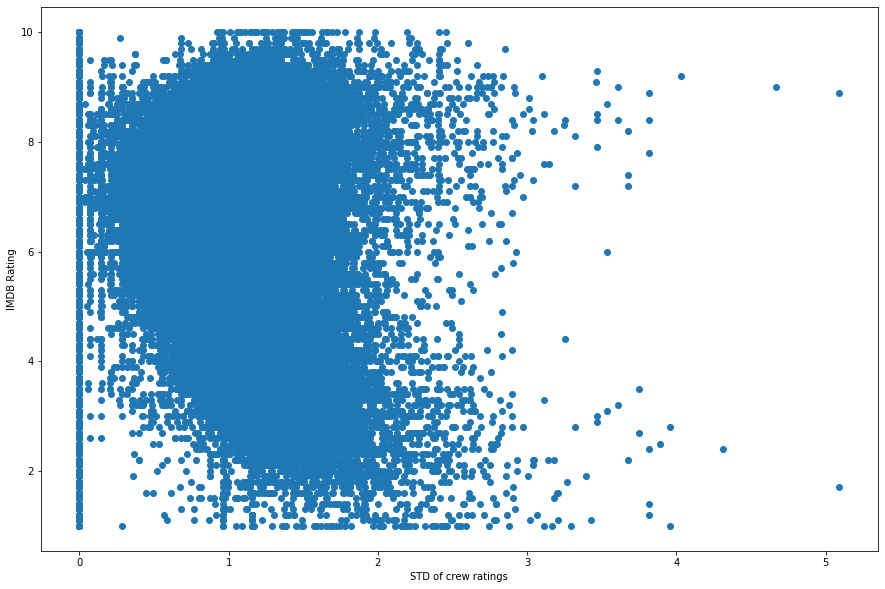

In [96]:
plt.figure(figsize=(15, 10))
plt.scatter(df['crew_std'], df['averageRating'])
plt.xlabel("STD of crew ratings")
plt.ylabel("IMDB Rating")

**Insights**: There is a k shape relationship between the std of the crew ratings of a movie and its IMDB rating. This may be because the higher deviation can only occur when either the crew has very high or very low rated films.

Text(0, 0.5, 'IMDB Rating')

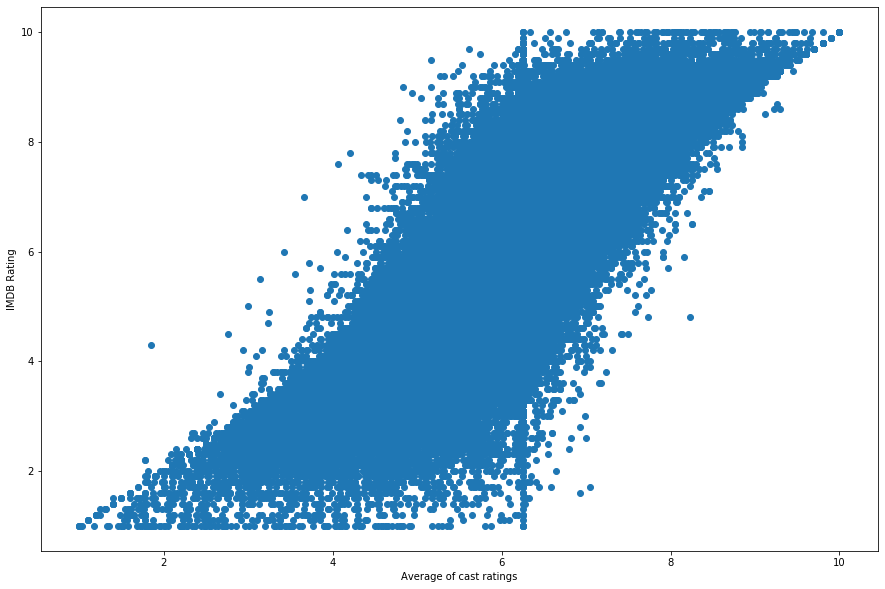

In [97]:
plt.figure(figsize=(15, 10))
plt.scatter(df['cast_mean'], df['averageRating'])
plt.xlabel("Average of cast ratings")
plt.ylabel("IMDB Rating")

**Insights**: There is a strong positive relationship between the mean cast rating of a movie and its IMDB rating.

Text(0, 0.5, 'IMDB Rating')

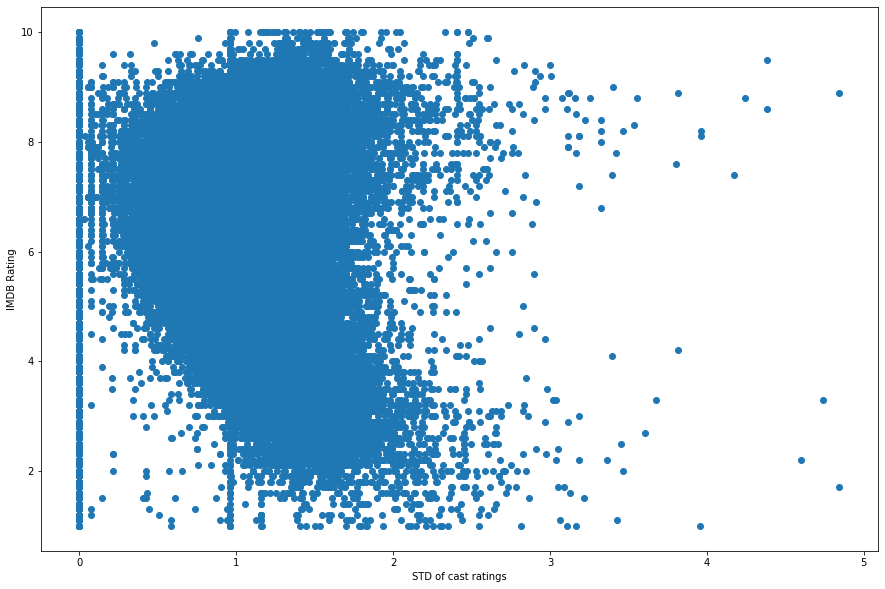

In [98]:
plt.figure(figsize=(15, 10))
plt.scatter(df['cast_std'], df['averageRating'])
plt.xlabel("STD of cast ratings")
plt.ylabel("IMDB Rating")

**Insights**: There is a k shape relationship between the std of the cast ratings of a movie and its IMDB rating. This may be because the higher deviation can only occur when either the cast has very highly or very low rated films.

Text(0, 0.5, 'IMDB Rating')

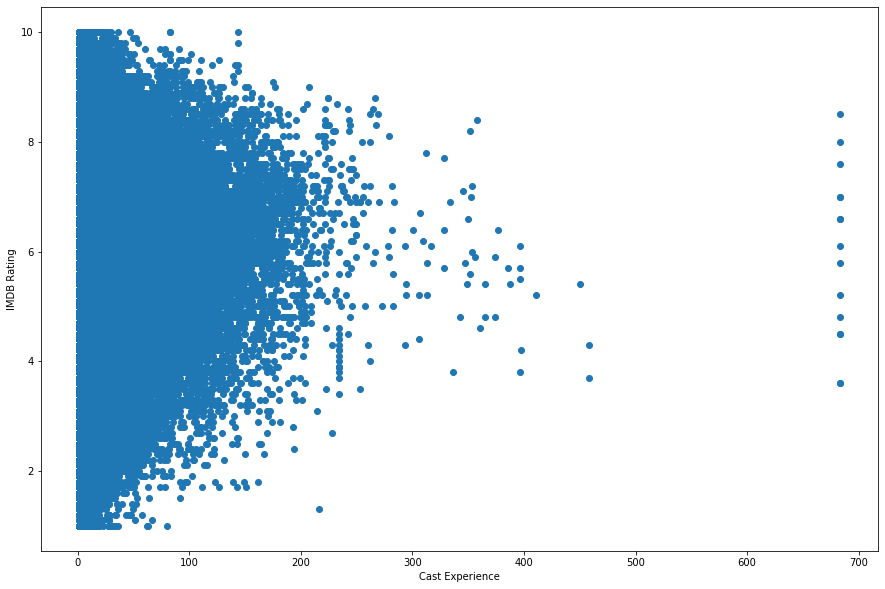

In [99]:
plt.figure(figsize=(15, 10))
plt.scatter(df['cast_exp'], df['averageRating'])
plt.xlabel("Cast Experience")
plt.ylabel("IMDB Rating")

**Insights**: Variance in quality reduces with experience

Text(0, 0.5, 'IMDB Rating')

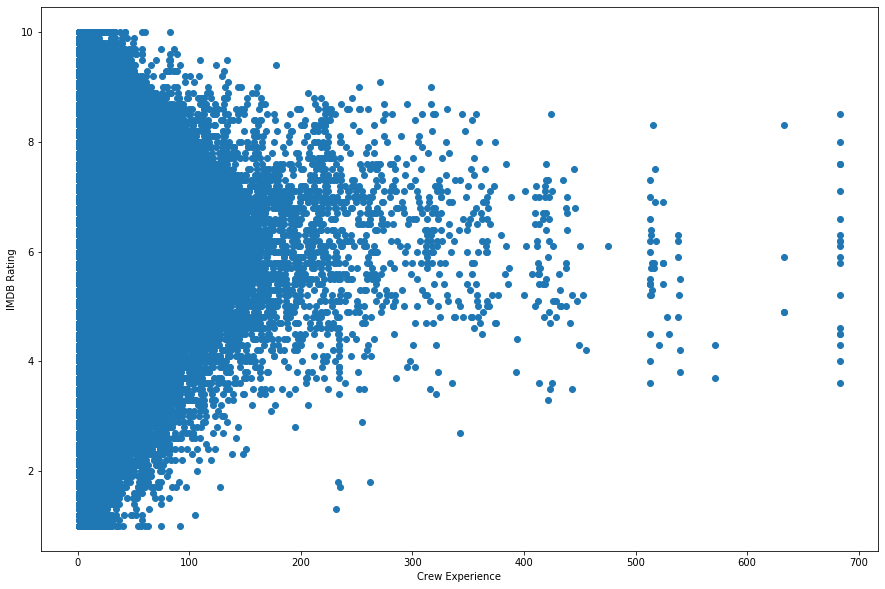

In [100]:
plt.figure(figsize=(15, 10))
plt.scatter(df['crew_exp'], df['averageRating'])
plt.xlabel("Crew Experience")
plt.ylabel("IMDB Rating")

**Insights**: Variance in quality reduces with experience

### Adult vs rating

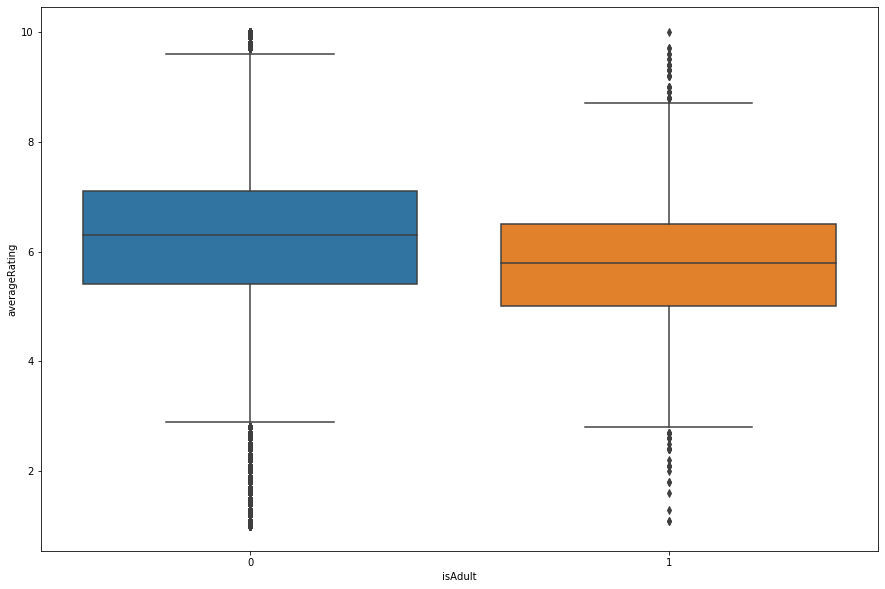

In [102]:
# data = [df[df['isAdult'] == 0]['averageRating'].values, df[df['isAdult'] == 1]['averageRating'].values]
# plt.figsize((10,20))
plt.figure(figsize=(15,10))
sns.boxplot(x = 'isAdult', y = 'averageRating', data = df)


**Insights**: Adult movies are slightly rated lower than non-adult films

### Genre vs ratings

In [80]:
genres = ['Action', 'Adult',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War',
       'Western']

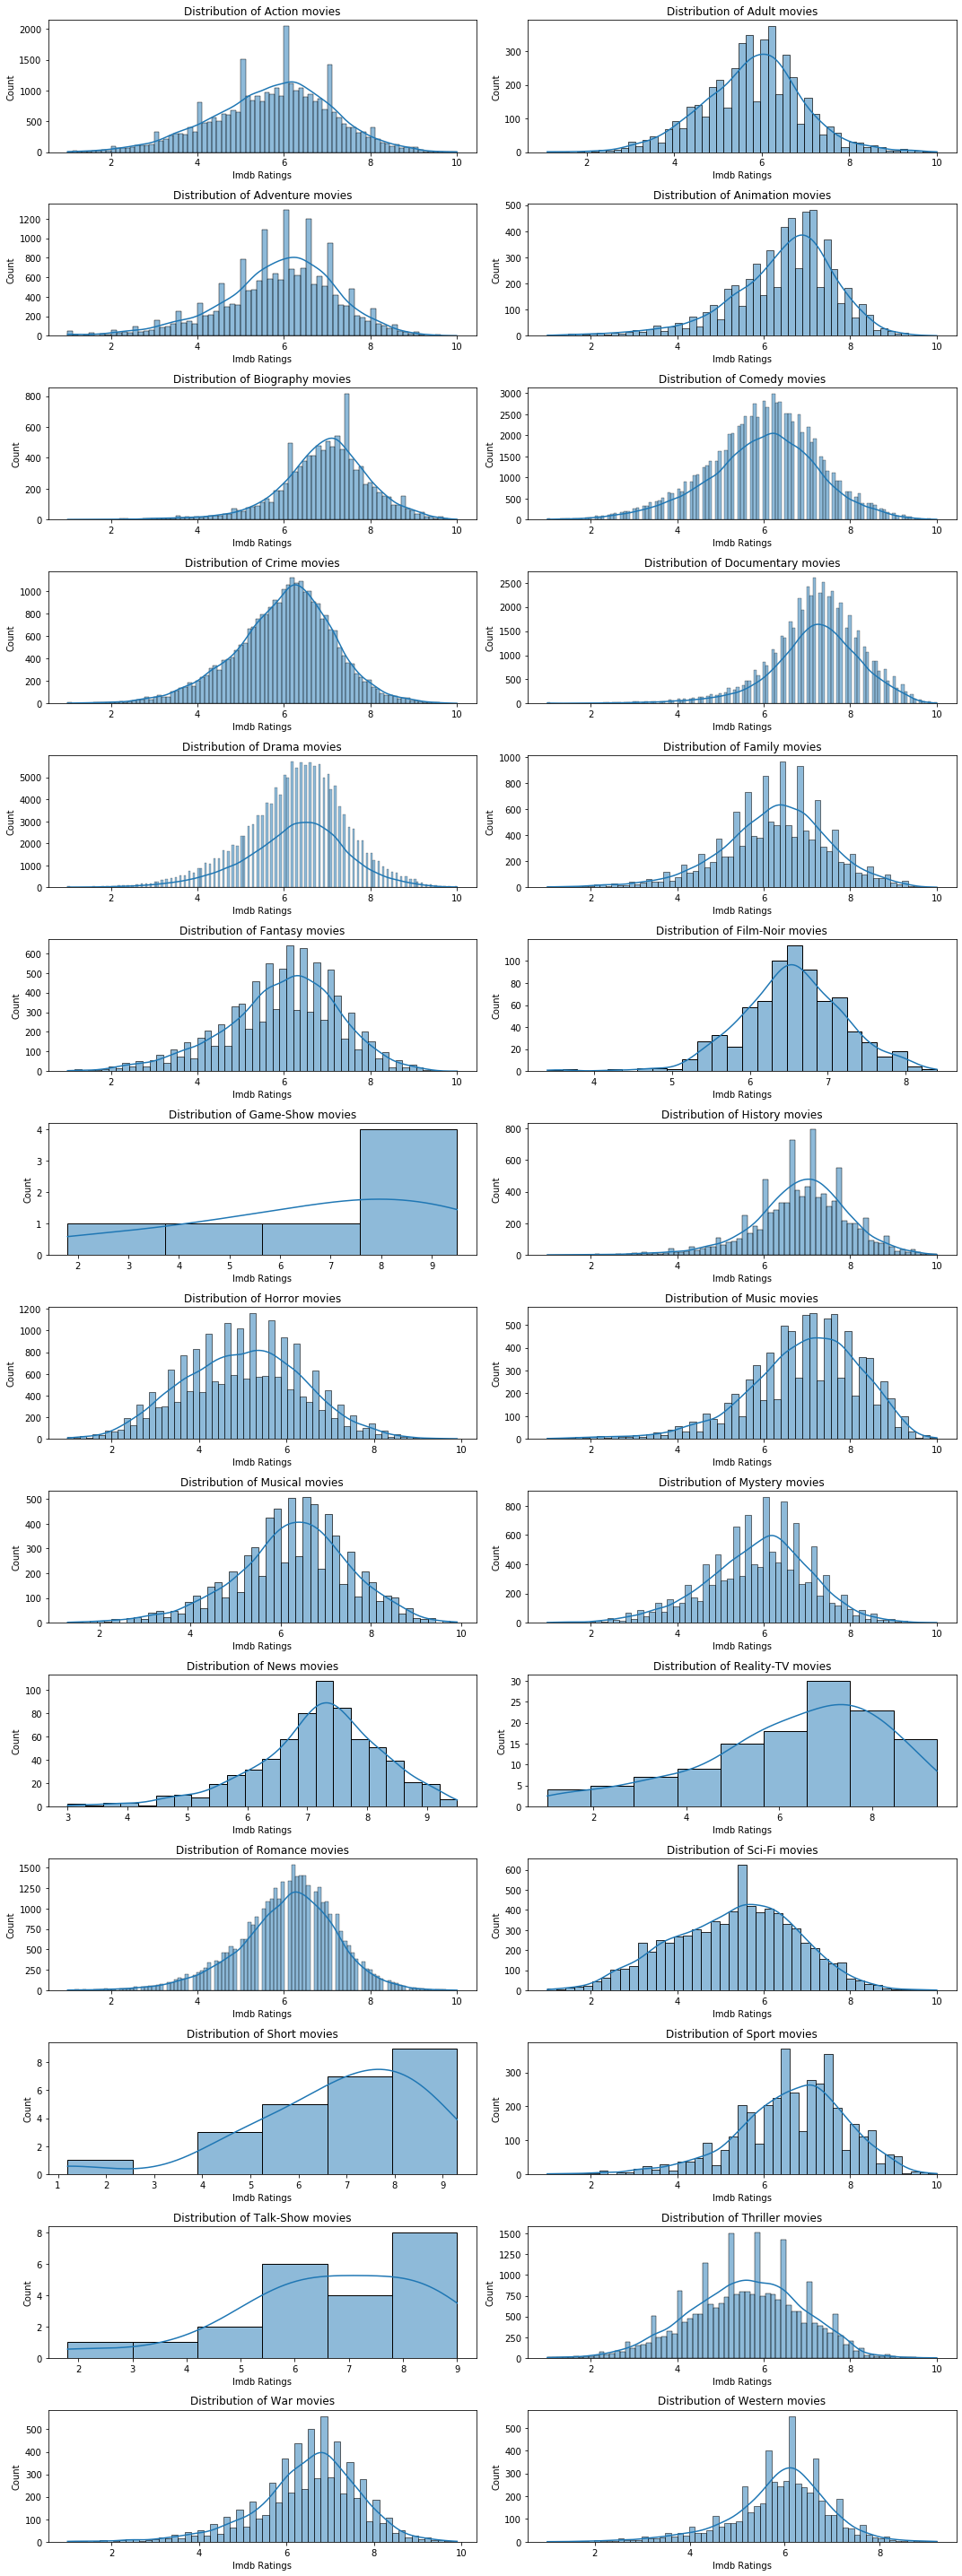

In [82]:
fig, axes = plt.subplots(nrows=len(genres)//2, ncols=2, figsize = (15,40))
for idx, g in enumerate(genres):
    data = df[df[g] == 1]['averageRating'].values
    ax_x, ax_y = idx//2, idx%2
    sns.histplot(data=data, kde=True, ax=axes[idx//2, idx%2])
    axes[ax_x, ax_y].set_xlabel("Imdb Ratings")
    axes[ax_x, ax_y].set_title(f'Distribution of {g} movies')
fig.tight_layout()

**Insights**: We see certain genres have ratings distributions deviating from the average

Better than average:
- War
- Sport
- Music and Musicals
- Documentaries

Worse than average:
- Sci-fi
- Horror
- Adult

## Correlations

In [18]:
train_cols = ['isAdult', 'startYear', 'runtimeMinutes', 'numVotes',
       'cast_mean', 'cast_std', 'cast_max', 'crew_mean', 'crew_std',
       'crew_max', 'cast_exp', 'crew_exp', 'numRegions', 'Action', 'Adult',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War',
       'Western']

In [19]:
features_df = df[train_cols]

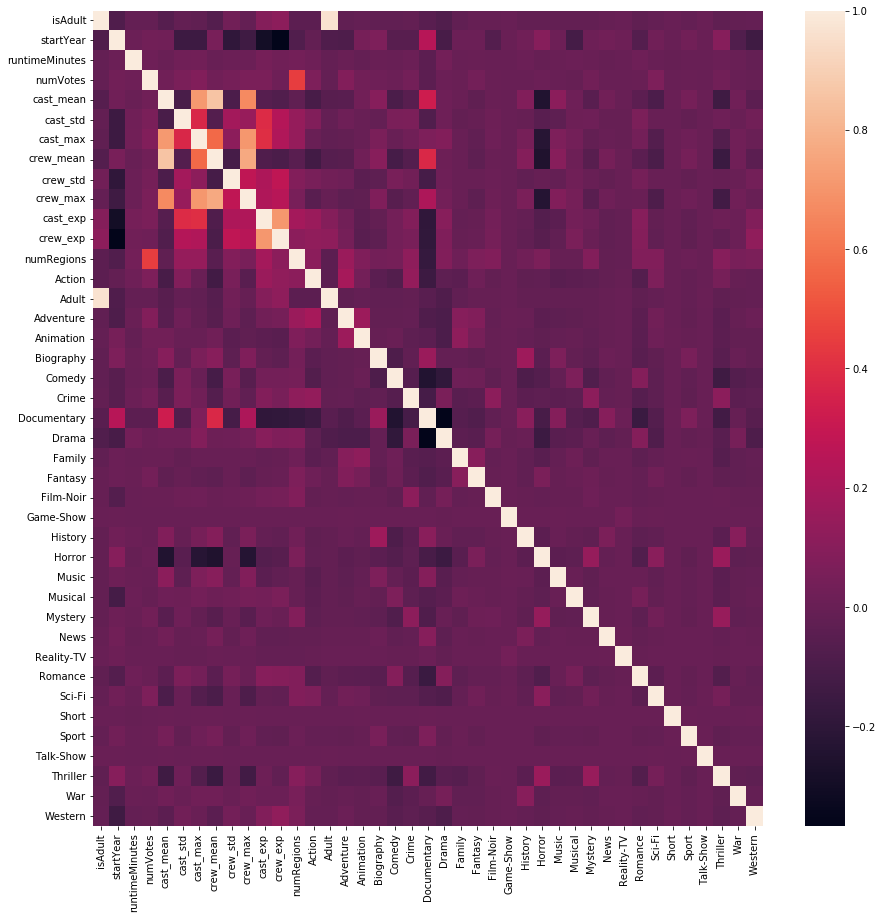

In [23]:
plt.figure(figsize = (15,15))
sns.heatmap(features_df.corr())

## Creating the final Training Dataset

In [62]:
df.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'runtimeMinutes', 'averageRating', 'numVotes', 'genres',
       'cast_mean', 'cast_std', 'cast_max', 'crew_mean', 'crew_std',
       'crew_max', 'cast_exp', 'crew_exp', 'numRegions', 'Action', 'Adult',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [63]:
training_df = df[['isAdult','startYear', 'runtimeMinutes', 
                  'averageRating', 'numVotes', 'cast_mean', 'cast_std', 'cast_max', 'crew_mean', 'crew_std',
                   'crew_max', 'cast_exp', 'crew_exp', 'numRegions', 'Action', 'Adult',
                   'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
                   'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History',
                   'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV',
                   'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War',
                   'Western']]

In [67]:
training_df.to_csv('processed/training_df.csv')